# K Nearest Neighbors com Python

Você recebeu um conjunto de dados classificados de uma empresa. Eles ocultaram a coluna de parâmetros, mas lhe deram os dados e a classe de destino.

Vamos tentar usar o KNN para criar um modelo que possa predizer diretamente a classe para um novo ponto de dados baseado nos parâmetros.

Vamos pegar e usá-lo!

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv('Classified Data',index_col=0)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [5]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [6]:
df.columns

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ',
       'TARGET CLASS'],
      dtype='object')

- **Normalização dos dados**
- O KNN exige a normalização dos dados, visto que os dados podem estar em escalas distantes e diferentes isso faria com que os menores fossem desprezados

In [7]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [12]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

- Padronizando os dados

In [16]:
df_std = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [17]:
df_std

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

- Definindo o DF de parâmetros df_std, para utilização

In [14]:
df_param  = pd.DataFrame(df_std,columns=df.columns[:-1])

In [15]:
df_param.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [18]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df_std, df['TARGET CLASS'], test_size=0.3)

- Importando o KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
knn = KNeighborsClassifier(n_neighbors=1)

In [24]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [25]:
predict = knn.predict(X_test)

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89       141
           1       0.89      0.93      0.91       159

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



In [28]:
print(confusion_matrix(y_test,predict))

[[122  19]
 [ 11 148]]


- Buscando o maximo de precisão variando com o número de vizinhos

In [29]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predict = knn.predict(X_test)
    error_rate.append(np.mean(predict != y_test))

In [30]:
error_rate

[0.1,
 0.09333333333333334,
 0.06666666666666667,
 0.07,
 0.07666666666666666,
 0.07,
 0.07666666666666666,
 0.06333333333333334,
 0.07,
 0.07,
 0.07333333333333333,
 0.07333333333333333,
 0.07333333333333333,
 0.07666666666666666,
 0.07666666666666666,
 0.08333333333333333,
 0.08,
 0.08333333333333333,
 0.08666666666666667,
 0.08333333333333333,
 0.08,
 0.08,
 0.07666666666666666,
 0.07666666666666666,
 0.07666666666666666,
 0.07666666666666666,
 0.06666666666666667,
 0.07333333333333333,
 0.06666666666666667,
 0.06333333333333334,
 0.06,
 0.06,
 0.06666666666666667,
 0.06666666666666667,
 0.07333333333333333,
 0.06,
 0.07333333333333333,
 0.07333333333333333,
 0.07666666666666666]

Text(0, 0.5, 'Taxa de erro')

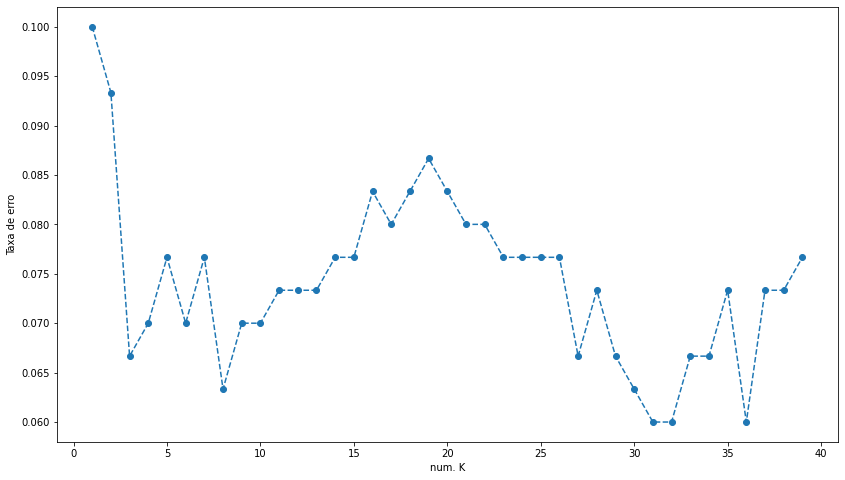

In [36]:
plt.figure(figsize=(14,8))
plt.plot(range(1,40),error_rate,marker='o',ls='--')
plt.xlabel('num. K')
plt.ylabel('Taxa de erro')

In [43]:
knn = KNeighborsClassifier(n_neighbors=32)
knn.fit(X_train,y_train)
predict = knn.predict(X_test)
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       141
           1       0.93      0.96      0.94       159

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300

